# Image Features and Homographies
Tony Smoragiewicz

In [39]:
# import libraries
import numpy as np
import math
import matplotlib.pyplot as plt

Various functions for Homework 3

In [40]:
# Find all normal lines from point pairs
def points2lines(points):
    lines = np.zeros([1,3])
    r,c = points.shape
    while(r>1):
        for i in np.arange(1,r):
            line = np.cross(points[i,:], points[0,:])
            lines = np.vstack([lines, line])
        points = points[1:,:]
        r,c = points.shape
    lines = lines[1:,:]
    return lines

# Convert linear eqn to rho-theta
def linear2hough(lines):
    rhotheta = np.zeros([lines.shape[0],2])
    for i in range(lines.shape[0]):
        slope = -lines[i,0]/lines[i,1]
        theta = math.atan(-1/slope)
        if theta !=(0):
            b = -lines[i,2]/lines[i,1]
            x = -b/(slope+1/slope)
            y = slope*x + b
            rho = x*np.cos(theta) + y*np.sin(theta)
        else:
            rho = -lines[i,2]/lines[i,0]
        rhotheta[i,:] = [rho, theta]
    return rhotheta

# Plot a list of vertices as lines
def verts2lines(vertices):
    for i in range(vertices.shape[0]):
        if i == vertices.shape[0]-1:
            x = [vertices[i,0], vertices[0,0]]
            y = [vertices[i,1], vertices[0,1]]      
        else:
            x = [vertices[i,0], vertices[i+1,0]]
            y = [vertices[i,1], vertices[i+1,1]]
        plt.plot(x,y)
    return

# Convert Hough to linear equation
def hough2linear(rhotheta):
    lines = np.zeros([rhotheta.shape[0],3])
    for i in range(lines.shape[0]):
        rho = rhotheta[i,0]
        theta = rhotheta[i,1]*np.pi/180
        # Theta needs to be +/-90deg
        if theta > np.pi/2:
            theta = theta-np.pi
        if theta < -np.pi/2:
            theta = theta+np.pi

        x = rho*np.cos(theta)
        y = rho*np.sin(theta)
        slope = -1/np.tan(theta)
        intercept = y-slope*x
        if theta==0:
            line = [1,0,-x]
        elif theta==np.pi/2 or theta==-np.pi/2:
            line = [0,-1/intercept,1]
        else:
            line = [slope/intercept,-1/intercept,1]
        lines[i,:] = line
        
    return lines

# Find line intersections
def intersect(lines):
    corners = np.zeros([lines.shape[0],3])
    for i in np.arange(lines.shape[0]):
        if i == lines.shape[0]-1:

            corner = np.cross(lines[i,:],lines[0,:])       
        else:
            corner = np.cross(lines[i,:],lines[i+1,:])
        corners[i,:] = corner/corner[2]
    return corners

# Rotate points around the z-axis
def rotz(theta):
    Tz = np.array([[np.cos(theta), -np.sin(theta), 0],
                   [np.sin(theta),  np.cos(theta), 0],
                   [            0,              0, 1]])
    return Tz

# Pad image with zeros
def pad(image,filter):
    r,c = filter.shape
    factor = int(np.floor(r/2))

    r_img, c_img = image.shape
    pad = np.zeros([r_img,factor])
    image = np.hstack([pad,image,pad])

    r_img, c_img = image.shape
    pad = np.zeros([factor,c_img])
    image = np.vstack([pad,image,pad])

    return image

# SSD feature matching
def SSD(image,filter):
    r,c = image.shape
    ssd = np.zeros([r,c])
    
    g = np.reshape(filter,[9,1])
    padded = pad(image,filter)
    for i in range(r):
        for j in range(c):
            f = padded[i:i+3,j:j+3]
            f = np.reshape(f,[1,9])
            ssd[i,j] = np.sum(f**2) + np.sum(g**2) - 2*np.dot(f,g)

    return ssd

# CC feature matching
def cross_corr(image,filter):
    r,c = image.shape
    cc = np.zeros([r,c])

    g = np.reshape(filter,[9,1])
    padded = pad(image,filter)
    for i in range(r):
        for j in range(c):
            f = padded[i:i+3,j:j+3]
            f = np.reshape(f,[1,9])
            cc[i,j] = np.dot(f,g)
            
    return cc

# Norm CC feature matching
def norm_cross_corr(image,filter):
    r,c = image.shape
    ncc = np.zeros([r,c])
    
    padded = pad(image,filter)
    for i in range(r):
        for j in range(c):
            f = padded[i:i+3,j:j+3]
            if np.sum(np.sqrt(f**2))==0:
                norm_f = np.zeros([f.shape[0],f.shape[1]])
            else:
                norm_f = f/np.sqrt(np.sum(f**2))
            norm_g = filter/np.sqrt(np.sum(filter**2))

            norm_f = np.reshape(norm_f,[1,9])
            norm_g = np.reshape(norm_g,[9,1])

            ncc[i,j] = np.dot(norm_f,norm_g)
            
    return ncc

# Problem #1
The area of the modified object is (2rho*90deg/2) = 90

Hough transform
Rho and Theta(deg):
[[ 2.    0.  ]
 [ 1.41 45.  ]
 [ 2.   90.  ]]
[[  4.  45.]
 [  2.  90.]
 [  4. 135.]]


/tmp/ipykernel_45450/1586172654.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -lines[i,0]/lines[i,1]
/tmp/ipykernel_45450/1586172654.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  theta = math.atan(-1/slope)
/tmp/ipykernel_45450/1586172654.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  x = -b/(slope+1/slope)


Text(0, 0.5, 'Theta (deg)')

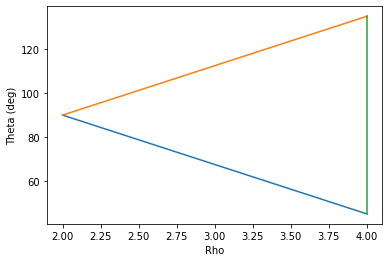

In [41]:
A = [2,0]
B = [2,2]
C = [0,2]
points = np.vstack([A,B,C])
r,c = points.shape
points = np.hstack([points, np.ones([r,1])])

lines = points2lines(points)
rhotheta = linear2hough(lines)

rhodeg = np.copy(rhotheta)
rhodeg[:,1] = rhodeg[:,1]*180/np.pi
print('Hough transform')
print('Rho and Theta(deg):')
print(np.around(rhodeg,2))

# Modified Object
rhotheta[:,0] = rhotheta[:,0]**2
rhotheta[:,1] = rhotheta[:,1]+np.pi/4
rhodeg = np.copy(rhotheta)
rhodeg[:,1] = rhodeg[:,1]*180/np.pi
print(np.around(rhodeg,2))
verts2lines(rhodeg)
plt.xlabel('Rho')
plt.ylabel('Theta (deg)')

# Problem #2

/tmp/ipykernel_45450/1586172654.py:56: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -1/np.tan(theta)


[[3.   3.   1.  ]
 [3.   0.27 1.  ]
 [0.63 1.63 1.  ]
 [2.   3.   1.  ]]


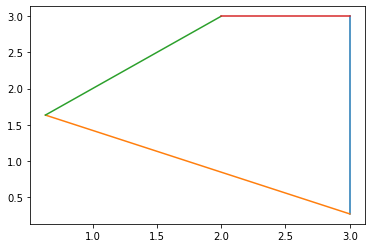

In [42]:
AB = [3,90]
BC = [3,0]
CD = [np.sqrt(3),60]
DA = [-np.sqrt(2)/2,-45]
sides = np.vstack([AB,BC,CD,DA])

# Convert Hough transform to linera equation
normlines = hough2linear(sides)

# Find the line intersections
corners = intersect(normlines)
print(np.around(corners,2))

# Plot the vertices and
verts2lines(corners)

(b) Rotate image by 30 degrees ccw around the image space origin

[[3.         3.         1.        ]
 [3.         0.26794919 1.        ]
 [0.6339746  1.6339746  1.        ]
 [2.         3.         1.        ]]


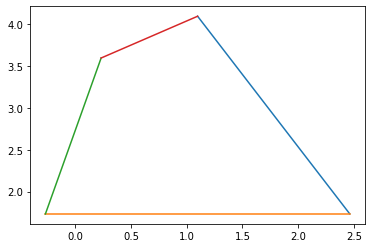

In [43]:
# Rotate 30d CCW about image space origin
angle = 30
theta = np.pi/180 * angle

r,c = corners.shape
CCW30 = np.zeros([r,c])
for i in range(r):
    CCW30[i,:] = np.matmul(rotz(theta),corners[i,:].T).T
print(corners)

verts2lines(CCW30)

# Problem #3

In [44]:
f = np.array([[0,0,0,0,0,0,0,0],
              [0,2,4,2,0,0,0,0],
              [0,2,0,0,0,0,0,0],
              [0,0,2,0,0,0,2,0],
              [0,0,0,0,0,0,2,0],
              [1,2,1,0,0,2,4,2],
              [0,1,0,0,0,0,0,0],
              [0,1,0,0,0,0,0,0]])

g = np.array([[1,2,1],
              [0,1,0],
              [0,1,0]])

(a) Find the SSD between f and g

In [45]:
ssd = SSD(f,g)
print(ssd)

[[12. 24. 24. 24. 12.  8.  8.  8.]
 [16. 24. 28. 24. 12.  8.  8.  8.]
 [12. 16. 12. 16.  8. 12.  8. 12.]
 [ 8.  8.  8. 12.  8. 16.  8. 16.]
 [11. 10.  7.  9. 12. 28. 20. 28.]
 [12.  9. 12.  9. 12. 24. 20. 24.]
 [ 7.  0.  7.  7.  8. 12.  8. 12.]
 [ 8.  4.  8.  8.  8.  8.  8.  8.]]


(b) Find the Correlation between f and g

In [46]:
cc = cross_corr(f,g)
print(cc)

[[ 0.  2.  4.  2.  0.  0.  0.  0.]
 [ 0.  4.  4.  2.  0.  0.  0.  0.]
 [ 2. 10. 14.  8.  2.  0.  2.  0.]
 [ 2.  4.  4.  0.  0.  0.  4.  0.]
 [ 1.  4.  5.  2.  0.  4. 10.  4.]
 [ 1.  3.  1.  0.  0.  4.  8.  4.]
 [ 4.  8.  4.  1.  2.  8. 12.  8.]
 [ 1.  3.  1.  0.  0.  0.  0.  0.]]


(c) Find the Normalized Correlation between f and g

In [47]:
ncc = norm_cross_corr(f,g)
print(np.around(ncc,3))

[[0.    0.158 0.289 0.158 0.    0.    0.    0.   ]
 [0.    0.289 0.267 0.158 0.    0.    0.    0.   ]
 [0.25  0.668 0.875 0.577 0.354 0.    0.354 0.   ]
 [0.354 0.5   0.5   0.    0.    0.    0.5   0.   ]
 [0.158 0.447 0.589 0.316 0.    0.267 0.625 0.267]
 [0.144 0.401 0.144 0.    0.    0.289 0.535 0.289]
 [0.535 1.    0.535 0.354 0.354 0.632 0.866 0.632]
 [0.25  0.75  0.25  0.    0.    0.    0.    0.   ]]


# Problem #4

(a) Homography
(b) 3 DOF
(c) 4 pairs are required
(d) No, having more is not helpful. They are just reduntant as long as your original ones are correct.
(e)
(f)
(g) The lines that are parallel to the x and y axis will not have vanishing points if the building plane is parallel to the image plane.